 # Medical MNIST Classif

Contexte du projet
La MedNIST est une base de données de 58 954 images (N&B, 64x64 pixels) issues du milieu médical. Les images sont labellisées en six catégories : AbdomenCT, BreastMRI, CXR, ChestCT, Hand et HeadCT. Le but est de prédire en fonction de l'image sa catégorie.
47 163 images vous sont fournies ; l'objectif est d'entrainer le modèle de Machine Learning ou de Deep Learning le plus performant possible : toutes les stratégies sont autorisées, seule la performance prime !

Les 11 791 images manquantes constituent le jeu de test : elles ne vous seront pas fournies et serviront à évaluer les performances de votre modèle par le formateur.

# Importing Libraries:

In [1]:
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout

from PIL import Image

# Image dataset Preparing:

In [2]:
# Déclarer le dossier du projet
PATH = r"C:\Users\Leo\Documents\Cours\Cours Simplon\Projet 19 - MedNIST Classification images issues du milieu medical\MedNIST Training Dataset"
p = pathlib.Path(PATH)

# Déclarer les labels qui prendront la valeur et le nom de chaque sous dossier constituant le dossier principal du projet
labels = [x.parts[-1] for x in p.iterdir()]

# Compter les labels
num_classes = len(labels)

#Trier les labels
labels.sort()

# Afficher les labels
labels

['AbdomenCT', 'BreastMRI', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [3]:
# Initier les listes files_path et files_labels pour stocker les chemins des fichiers et les noms des répertoires parent
files_path = []
files_labels = []

# Création d'une boucle: commence le processus de parcours du répertoire spécifié par le chemin PATH en utilisant la fonction os.walk(). Cette fonction renvoie trois valeurs à chaque itération :
# root : Le chemin du répertoire actuel.
# dirs : Une liste des noms des sous-répertoires dans le répertoire actuel.
# files : Une liste des noms des fichiers dans le répertoire actuel.
for root, dirs, files in os.walk(PATH):
  p = pathlib.Path(root)
  
  for file in files:
    files_path.append(root + '/' + file)
    files_labels.append(p.parts[-1])

In [4]:
# Afficher le premier fichier
files_path[0]

'C:\\Users\\Leo\\Documents\\Cours\\Cours Simplon\\Projet 19 - MedNIST Classification images issues du milieu medical\\MedNIST Training Dataset\\AbdomenCT/000000.jpeg'

In [5]:
# Afficher le nombre de fichier dans chaque liste
len(files_path), len(files_labels)

(47169, 47169)

# Data study:

In [6]:
# Afficher le nombre de labels par catégorie
label_cnt = []

for label in labels:
  print(label, files_labels.count(label))
  label_cnt.append(files_labels.count(label))

AbdomenCT 8000
BreastMRI 7163
CXR 8000
ChestCT 8000
Hand 8000
HeadCT 8006


<BarContainer object of 6 artists>

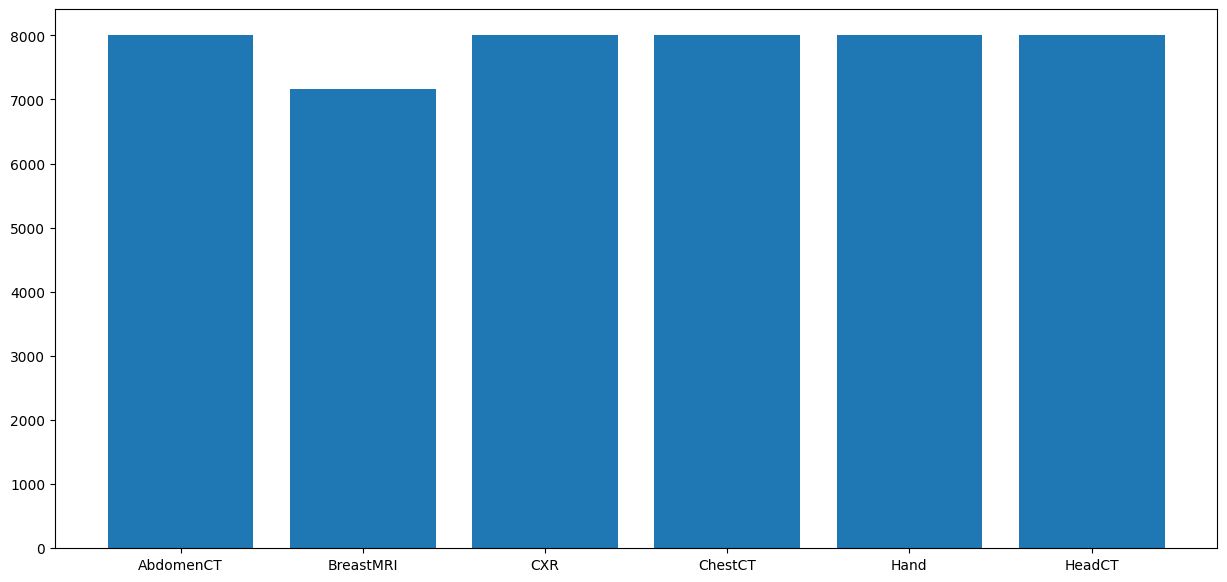

In [7]:
# Afficher le nombre de labels par catégorie
plt.figure(figsize=(15, 7))
plt.bar(labels, label_cnt)

# Preprocessing:

In [8]:
# Définir une fonction 
def prepare_X_y(files_path, width=64, height=64):
  X = []
  y = []

  # Pour chaque fichier dans le dossier, l'ouvrir et le charger  
  for path in files_path:
    img = Image.open(path)
    img.load()
      
    # Si la taille de l'image n'est pas égale à 64, la redimenssioner
    if (width or height) != 64:
      img = img.resize((width, height))

    # Converti l'image en array numpy au format int16  
    img_X = np.asarray(img, dtype=np.int16)
    X.append(img_X)

  # Attribution des features, target  
  X = np.array(X)
  y = np.array(files_labels)

  # Renvoie les tableaux numpy X et y contenant les images et les labels
  return X, y

In [9]:
# Affichage des dimensions du tableau numpy
X, y = prepare_X_y(files_path)
X.shape, y.shape

((47169, 64, 64), (47169,))

Text(0.5, 1.0, 'ChestCT')

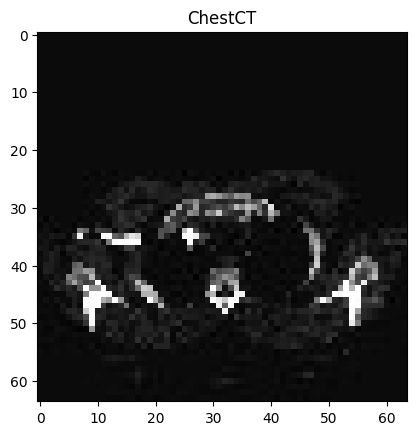

In [10]:
# Affichier une image ciblée et la convertissant en 'gris'
plt.imshow(X[22200], cmap='gray')
plt.title(y[22200])

In [11]:
# Division des données en différents jeux d'entrainements et de tests. Séparation égale et répartie
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Affichage des dimensions du tableau numpy
X_train.shape, y_train.shape

((37735, 64, 64), (37735,))

In [13]:
# Définir une fonction 'preprocess' qui prendra en entrée X_train, y_train, X_test et y_test.
def preprocess(X_train, y_train, X_test, y_test):
  
  # La ligne suivante utilise la fonction 'map' pour appliquer une fonction lambda à chaque élément de la liste 'y_train'.
  # La fonction lambda prend un élément 'x' de 'y_train' et renvoie l'index de 'x' dans la liste 'labels'.
  y_train = list(map(lambda x: labels.index(x), y_train))
  
  # La liste 'y_train' est ensuite convertie en un tableau NumPy.
  y_train = np.array(y_train)

  # La ligne suivante effectue la même opération que ci-dessus, mais pour la liste 'y_test'.
  y_test = list(map(lambda x: labels.index(x), y_test))
  
  # La liste 'y_test' est ensuite convertie en un tableau NumPy.
  y_test = np.array(y_test)
  
  # Les deux tableaux NumPy 'y_train' et 'y_test' sont ensuite convertis en vecteurs binaires en utilisant 'to_categorical'.
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)

  # Enfin, la fonction renvoie les données d'entrée 'X_train' et 'X_test' ainsi que les labels prétraités 'y_train' et 'y_test'.
  return X_train, y_train, X_test, y_test


In [14]:
# Appliquer la fonction preprocess à l'ensemble des jeux de données
X_train, y_train, X_test, y_test = preprocess(X_train, y_train, X_test, y_test)

In [15]:
# Transformation des données d'entraînement et de test, qui étaient initialement des matrices (typiquement des images 2D), en vecteurs 1D, ce qui facilite leur utilisation pour un modeletfr  rnn
X_train = X_train.reshape(X_train.shape[0], -1) # = (B, 64x64)
X_test = X_test.reshape(X_test.shape[0], -1)

# Modeling:

In [16]:
# Création d'une fonction pour  définir un réseau de neuronnes 
def get_model():
  model = Sequential([ # une variable model est initialisée en créant un modèle séquentiel. Un modèle séquentiel est un type de modèle de réseau neuronal qui permet d'empiler des couches les unes sur les autres de manière séquentielle.
      Dense(1024, kernel_initializer="glorot_uniform", activation='relu'), # Ajoute une couche Dense au modèle avec 1024 neurones, une initialisation de poids "glorot_uniform" (qui est une technique d'initialisation des poids), et une fonction d'activation 'relu' (Rectified Linear Unit)
      Dense(256, kernel_initializer="glorot_uniform", activation='relu'), # Une autre couche Dense est ajoutée au modèle avec 256 neurones, la même initialisation de poids et la même fonction d'activation 'relu'.
      Dense(64, kernel_initializer="glorot_uniform", activation='relu'), # Une troisième couche Dense est ajoutée avec 64 neurones, la même initialisation de poids et la même fonction d'activation 'relu'.
      Dense(num_classes, kernel_initializer="glorot_uniform", activation='softmax'), # Enfin, une dernière couche Dense est ajoutée avec un nombre de neurones égal à la variable num_classes. Cette couche utilise l'initialisation des poids "glorot_uniform" et la fonction d'activation 'softmax', ce qui est typique pour la couche de sortie d'un modèle de classification.
  ])

  return model

In [17]:
BATCH_SIZE = 32 # définit une constante BATCH_SIZE avec la valeur 32. Il s'agit de la taille des mini-lots (batches) qui seront utilisés lors de l'apprentissage du modèle. Les données d'entraînement seront divisées en lots de 32 exemples à la fois.
history_acc = [] # history_acc est créée pour stocker l'historique de l'accuracy (précision) pendant l'apprentissage du modèle.
history_val_acc = [] # history_val_acc est créée pour stocker l'historique de la précision sur l'ensemble de validation pendant l'apprentissage.
history_loss = [] # history_loss est créée pour stocker l'historique de la perte (loss) pendant l'apprentissage du modèle.
history_val_loss = [] # history_val_loss est créée pour stocker l'historique de la perte sur l'ensemble de validation pendant l'apprentissage.
model = get_model() # créer un modèle en appelant la fonction get_model(). Le modèle est stocké dans la variable model.

# Compilation du modele avec l'optimiseur "adam", une fonction de perte "categorical_crossentropy" (utilisée pour la classification multiclasse), et la métrique de "accuracy" (précision) pour évaluer les performances du modèle.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement du modèle en utilisant les données d'entraînement X_train et les étiquettes correspondantes y_train. Les données de validation sont spécifiées avec validation_data, verbose indique l'affichage des informations d'entraînement, le batch_size est défini sur la constante BATCH_SIZE, et le modèle est entraîné pendant 10 époques (epochs). Les informations d'entraînement et de validation sont stockées dans l'objet history.
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=BATCH_SIZE, epochs=10)

# Afficher les différents scores
history_acc = history.history['accuracy']
history_val_acc = history.history['val_accuracy']
history_loss = history.history['loss']
history_val_loss = history.history['val_loss']

Epoch 1/10
1180/1180 [==============================] - 51s 43ms/step - loss: 11.4292 - accuracy: 0.9089 - val_loss: 0.6659 - val_accuracy: 0.9789
Epoch 2/10
1180/1180 [==============================] - 51s 43ms/step - loss: 0.5316 - accuracy: 0.9635 - val_loss: 0.1749 - val_accuracy: 0.9869
Epoch 3/10
1180/1180 [==============================] - 51s 43ms/step - loss: 0.4579 - accuracy: 0.9663 - val_loss: 0.3983 - val_accuracy: 0.9431
Epoch 4/10
1180/1180 [==============================] - 50s 43ms/step - loss: 0.1851 - accuracy: 0.9782 - val_loss: 0.1421 - val_accuracy: 0.9892
Epoch 5/10
1180/1180 [==============================] - 51s 43ms/step - loss: 0.1297 - accuracy: 0.9813 - val_loss: 0.8294 - val_accuracy: 0.8596
Epoch 6/10
1180/1180 [==============================] - 53s 45ms/step - loss: 0.1755 - accuracy: 0.9769 - val_loss: 0.3222 - val_accuracy: 0.9785
Epoch 7/10
1180/1180 [==============================] - 52s 44ms/step - loss: 0.0969 - accuracy: 0.9871 - val_loss: 0.0917 

# Model Evaluation:

In [18]:
# Définir l'évolution de l'accuracy et de la loss en fonction du nombre d'époques entraînées
def plot_acc_loss(history):
  plt.figure(figsize=(20, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()

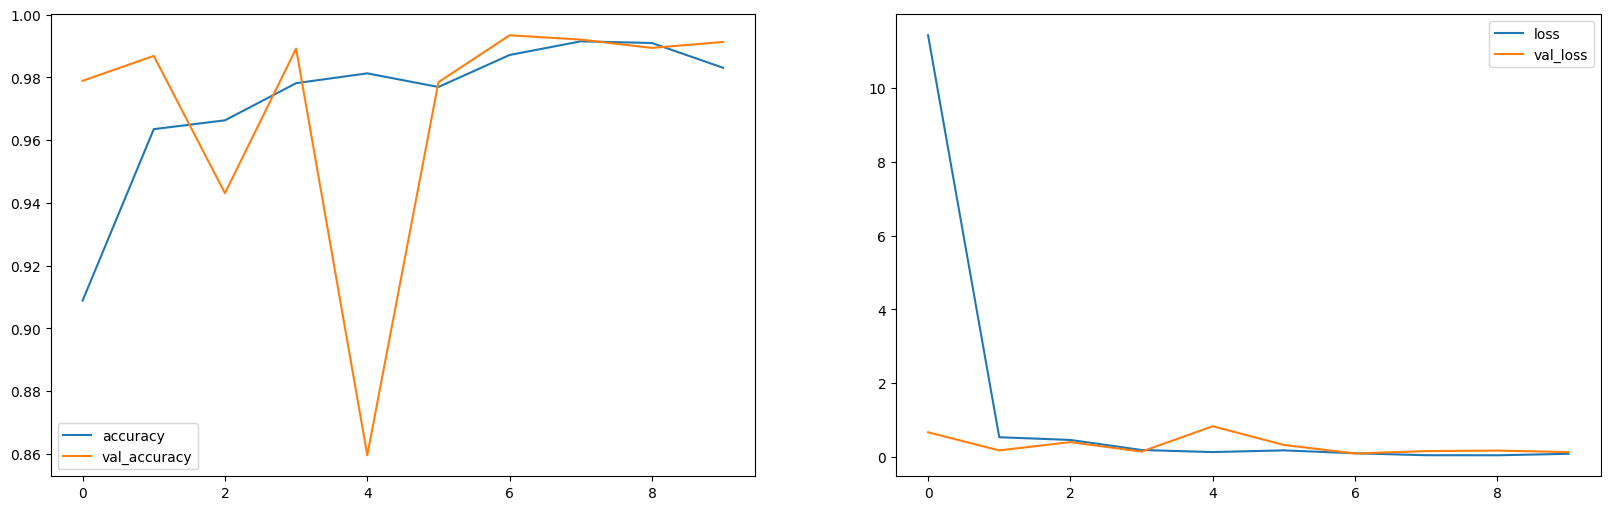

In [19]:
plot_acc_loss(history)

295/295 [==============================] - 1s 5ms/step


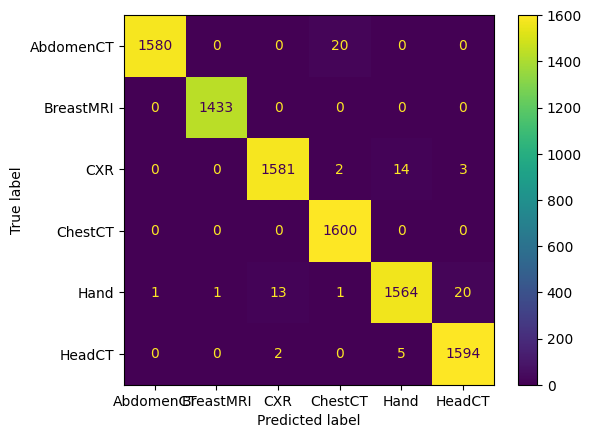

In [20]:
# Obtenir les prédictions de votre modèle
y_pred = model.predict(X_test)

# Convertir les prédictions en classes prédites (indices)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir les étiquettes de test en classes réelles (indices)
y_true_classes = np.argmax(y_test, axis=1)

# Créer la matrice de confusion
confusion = confusion_matrix(y_true_classes, y_pred_classes)

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion, display_labels=labels)
disp.plot(cmap='viridis', values_format='d')

plt.show()

In [22]:
# enregistrer le modele 
# Spécifier le chemin du fichier pour enregistrer le modèle
model_path = "model sauvegarde"

# Enregistrer le modèle
model.save(model_path)

INFO:tensorflow:Assets written to: model sauvegarde\assets


INFO:tensorflow:Assets written to: model sauvegarde\assets
